Text(0, 0.5, 'Пол')

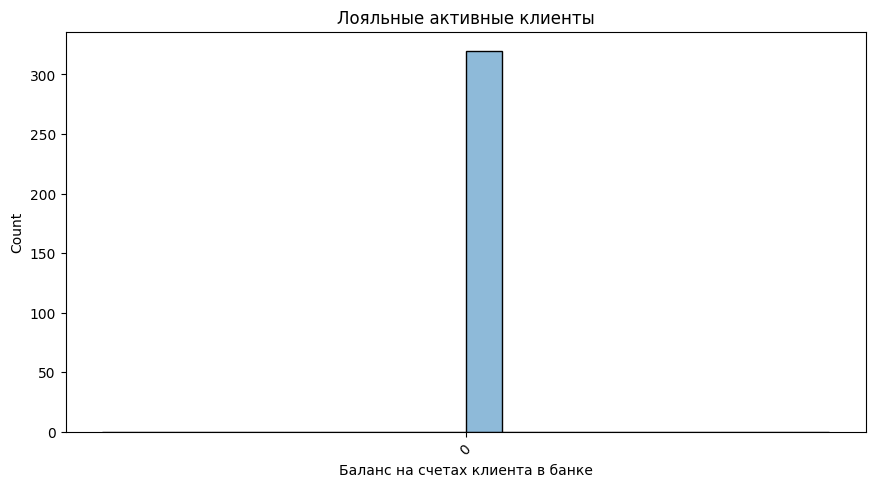

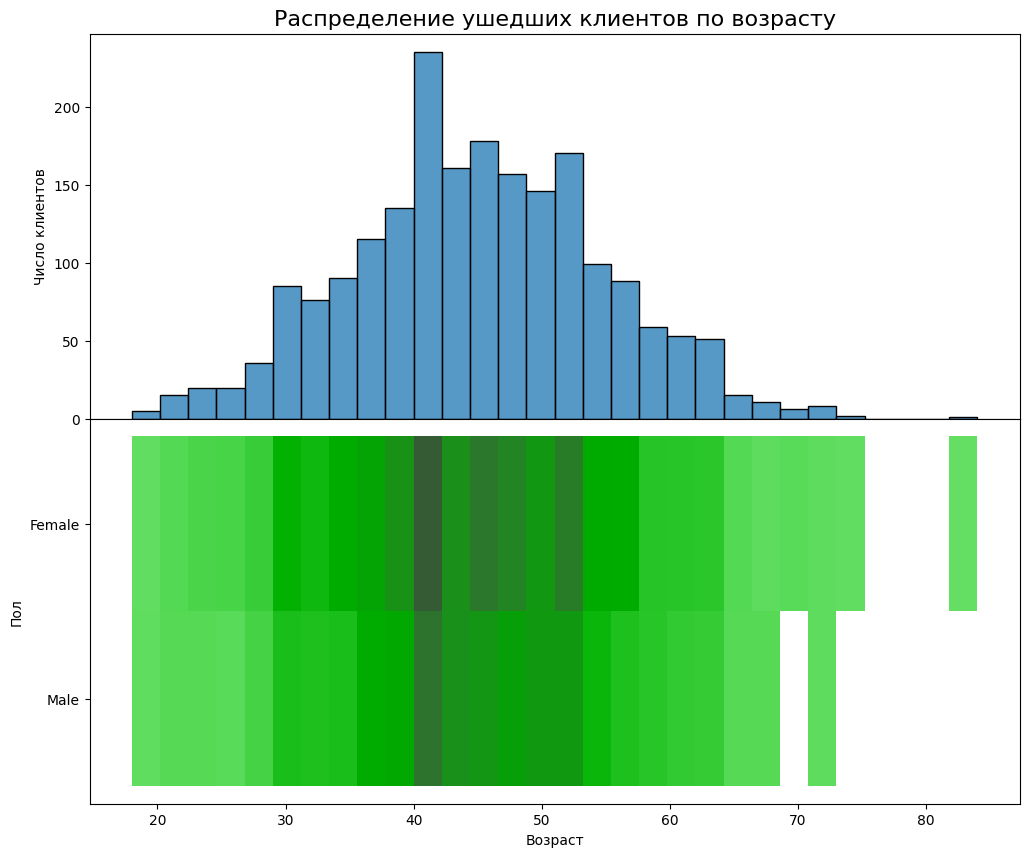

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline
churn_data_zero = pd.read_csv('data/churn.csv')
churn_data = churn_data_zero.copy()
churn_data = churn_data.drop('RowNumber', axis=1)
#churn_data.info()
#churn_data_active_member = churn_data['Exited'].value_counts()
#print(churn_data_active_member)
#IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент
mask = (churn_data['Exited'] == 1) & (churn_data['IsActiveMember'] == 0) & (churn_data['Balance'] < 2000)
#display(churn_data[mask])

churn_data_balance = churn_data[mask]
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
listOf_Xticks = np.arange(0, 2000, 50)
axes.set_xticks(listOf_Xticks);
axes.xaxis.set_tick_params(rotation=45)
axes.set_title('Лояльные активные клиенты');
sns.histplot(
    data=churn_data_balance,
    x='Balance',
    bins=20,
    kde=True,
    
);
axes.set_xlabel('Баланс на счетах клиента в банке');

churn_data_balance['Gender'].value_counts()

mask = churn_data['Exited']  == 1
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=churn_data[mask], 
    x='Age', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение ушедших клиентов по возрасту', fontsize=16)
histplot1.set_xlabel('Возраст клиентов')
histplot1.set_ylabel('Число клиентов')

histplot2 = sns.histplot(
    data=churn_data[mask],
    x='Age',
    y='Gender',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Возраст')
histplot2.set_ylabel('Пол')